In [41]:
!conda install sklearn

Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - sklearn

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [67]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
x_train = np.load('/Users/srikanth.goli/Downloads/5pc2j46cbc-1/Npy_files/x_train.npy') 
y_train = np.load('/Users/srikanth.goli/Downloads/5pc2j46cbc-1/Npy_files/y_train.npy')  
x_test = np.load('/Users/srikanth.goli/Downloads/5pc2j46cbc-1/Npy_files/x_test.npy')    
y_test = np.load('/Users/srikanth.goli/Downloads/5pc2j46cbc-1/Npy_files/y_test.npy') 

In [3]:
# preprocess
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [4]:
# channel dimension
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [74]:
print(len(y_train) + len(y_test))
print(len(y_test))

7790
779


In [75]:
y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [5]:
model = Sequential()

# first convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(19, 500, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=8, batch_size=32, validation_split=0.1)

Epoch 1/8


2024-08-06 22:02:53.337621: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


198/198 [==============================] - 12s 59ms/step - loss: 0.7921 - accuracy: 0.6839 - val_loss: 0.6683 - val_accuracy: 0.7222
Epoch 2/8
198/198 [==============================] - 12s 60ms/step - loss: 0.5908 - accuracy: 0.7694 - val_loss: 0.4456 - val_accuracy: 0.8319
Epoch 3/8
198/198 [==============================] - 12s 61ms/step - loss: 0.4564 - accuracy: 0.8287 - val_loss: 0.3484 - val_accuracy: 0.8590
Epoch 4/8
198/198 [==============================] - 12s 63ms/step - loss: 0.3735 - accuracy: 0.8607 - val_loss: 0.3235 - val_accuracy: 0.8889
Epoch 5/8
198/198 [==============================] - 12s 63ms/step - loss: 0.3374 - accuracy: 0.8767 - val_loss: 0.2784 - val_accuracy: 0.8860
Epoch 6/8
198/198 [==============================] - 13s 64ms/step - loss: 0.2893 - accuracy: 0.8886 - val_loss: 0.2861 - val_accuracy: 0.8860
Epoch 7/8
198/198 [==============================] - 13s 64ms/step - loss: 0.2860 - accuracy: 0.8894 - val_loss: 0.2893 - val_accuracy: 0.9003
Epoch 8/8

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

25/25 [==============================] - 0s 16ms/step - loss: 0.2319 - accuracy: 0.9037
Test accuracy: 0.9037227034568787
Test loss: 0.23190857470035553


25/25 [==============================] - 0s 16ms/step


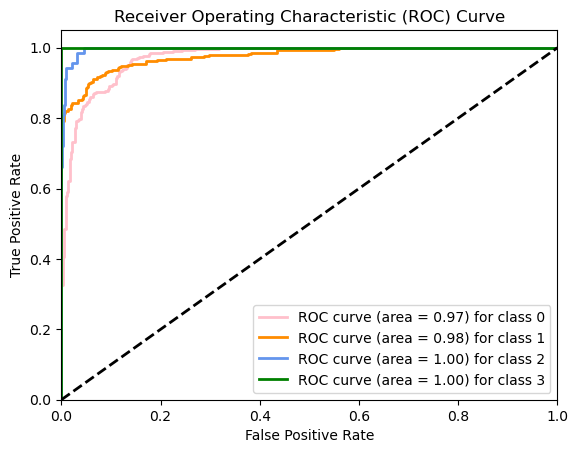

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['pink', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [61]:
y_pred

array([2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0,
       1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 3, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,

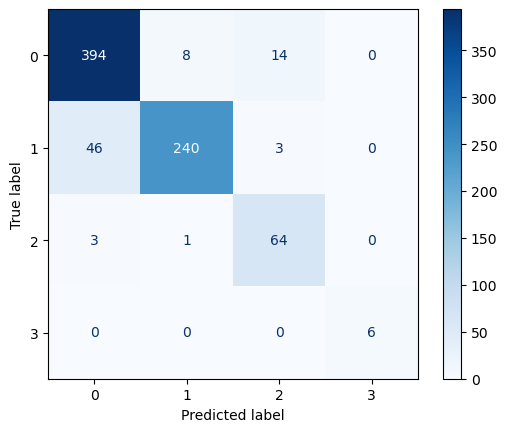

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [11]:
from sklearn.metrics import classification_report

report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
print(report)

accuracy = np.sum(y_true_classes == y_pred_classes) / len(y_true_classes)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

     Class 0       0.89      0.95      0.92       416
     Class 1       0.96      0.83      0.89       289
     Class 2       0.79      0.94      0.86        68
     Class 3       1.00      1.00      1.00         6

    accuracy                           0.90       779
   macro avg       0.91      0.93      0.92       779
weighted avg       0.91      0.90      0.90       779

Accuracy: 0.9037227214377407


In [57]:
# specificity

In [60]:
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from numpy import *

y_true = y_true_classes
y_pred = y_pred_classes

confusion_matrix = confusion_matrix(y_true, y_pred).ravel()
print(confusion_matrix)

class_specificity_cnn = {}
class_sensitivity_cnn = {}


for idx in range(0, len(confusion_matrix), 4):
    tn = confusion_matrix[idx]
    fp = confusion_matrix[idx+1]
    specificity = 0.0 if isnan(tn / (tn+fp)) else round(tn / (tn+fp), 2)
    class_specificity_cnn[int(idx/4)] = specificity
    
    fn = confusion_matrix[idx+2]
    tp = confusion_matrix[idx+3]
    sensitivity = 0.0 if isnan(tp / (tp+fn)) else round(tp / (tp+fn), 2)
    class_sensitivity_cnn[int(idx/4)] = sensitivity
    
    
# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# specificity_cnn = tn / (tn+fp)
# specificity_cnn
print(class_specificity_cnn)
print(class_sensitivity_cnn)

[394   8  14   0  46 240   3   0   3   1  64   0   0   0   0   6]
{0: 0.98, 1: 0.16, 2: 0.75, 3: 0.0}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}


/var/folders/4j/hpmfkq9n6bz2s36bg0wbxw040000gn/T/ipykernel_13544/3079008799.py:18: RuntimeWarning: invalid value encountered in long_scalars
  specificity = 0.0 if isnan(tn / (tn+fp)) else round(tn / (tn+fp), 2)


In [58]:
# sensitivity

In [12]:
# log loss

from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred)
print(f'Log Loss: {logloss}')

Log Loss: 0.2319086559035854


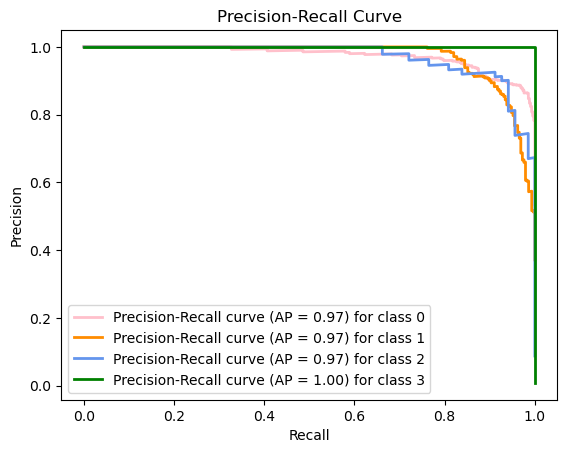

In [14]:
# precision-recall curve and average precision score - evalute models on highly imbalenced dataset

from sklearn.metrics import precision_recall_curve, average_precision_score

precision = {}
recall = {}
average_precision = {}

for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

plt.figure()
for i, color in zip(range(4), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve (AP = {average_precision[i]:.2f}) for class {i}')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [24]:
import seaborn as sns
import pandas as pd

metrics_report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'], output_dict=True)

report_df = pd.DataFrame(metrics_report).transpose().reset_index()

clean_report = report_df[(report_df['index'] == "Class 0") |\
                         (report_df['index'] == "Class 1") |\
                         (report_df['index'] == "Class 2") |\
                         (report_df['index'] == "Class 3")]

clean_report.head()

,index,precision,recall,f1-score,support
0,Class 0,0.889391,0.947115,0.917346,416.0
1,Class 1,0.963855,0.830450,0.892193,289.0
2,Class 2,0.790123,0.941176,0.859060,68.0
3,Class 3,1.000000,1.000000,1.000000,6.0


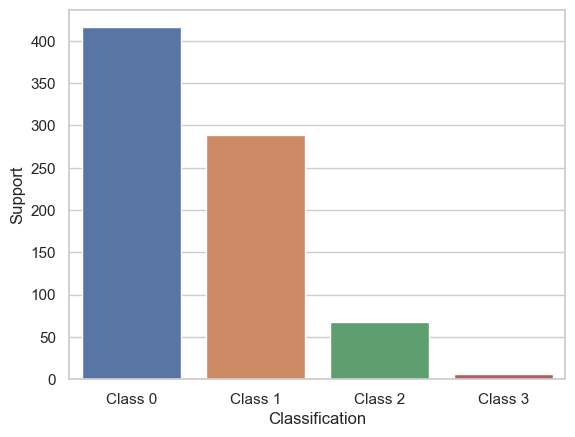

In [25]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=clean_report, x = "index", y = "support")
ax.set(xlabel='Classification', ylabel='Support')
plt.show()

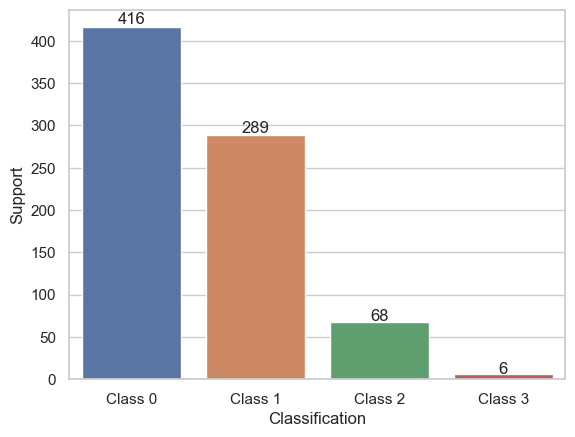

In [100]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

sns.set_theme(style="whitegrid")

test = sns.barplot(data=clean_report, x = "index", y = "support")
test.set(xlabel='Classification', ylabel='Support')

        
show_values(test)

ValueError: could not convert string to float: 'Class 0'

<Figure size 1000x800 with 0 Axes>

In [37]:
keep_index = ["Class 0", "Class 1", "Class 2", "Class 3"]

heatmap_df = pd.DataFrame(metrics_report).transpose()
heatmap_df_idx = heatmap_df[heatmap_df.index.isin(keep_index)]
heatmap_df__cln = heatmap_df_idx.drop(columns=['support'])
heatmap_df__cln.head()

,precision,recall,f1-score
Class 0,0.889391,0.947115,0.917346
Class 1,0.963855,0.830450,0.892193
Class 2,0.790123,0.941176,0.859060
Class 3,1.000000,1.000000,1.000000


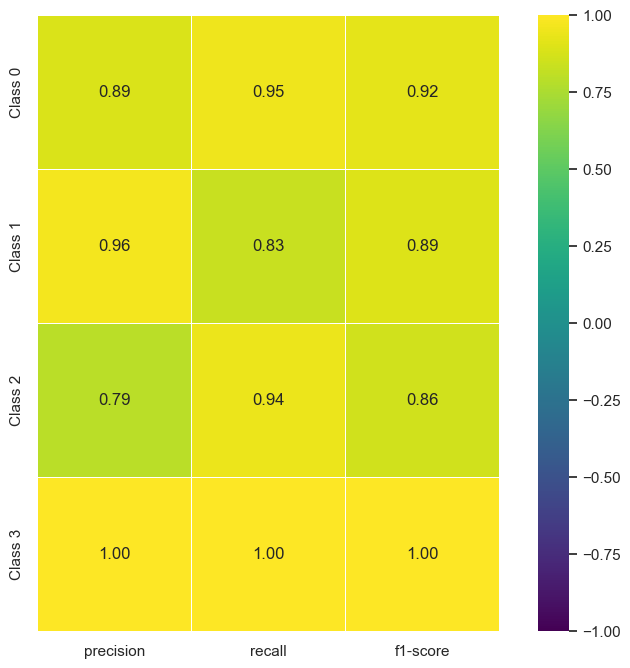

In [38]:
# Create an annotated heatmap

report_df = pd.DataFrame(metrics_report).transpose()

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(heatmap_df__cln, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()


In [43]:
from sklearn.metrics import confusion_matrix

In [65]:
len(y_pred)

779

In [ ]:
print(len(y_train) + len(y_test))
print(len(y_test))

In [77]:
total_data = np.concatenate([y_train, y_test])


7790

In [80]:
final_total_data = pd.DataFrame({'Class 0': total_data[:, 0], 'Class 1': total_data[:, 1], 'Class 2': total_data[:, 2], 'Class 3': total_data[:, 3]})

final_total_data.head()

,Class 0,Class 1,Class 2,Class 3
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [96]:
total_class_records = final_total_data.sum().to_frame().reset_index()

print(total_class_records)

     index       0
0  Class 0  3895.0
1  Class 1  3034.0
2  Class 2   750.0
3  Class 3   111.0


In [97]:
total_class_records.columns = ["Class", "Data Points"]

total_class_records

,Class,Data Points
0,Class 0,3895.0
1,Class 1,3034.0
2,Class 2,750.0
3,Class 3,111.0


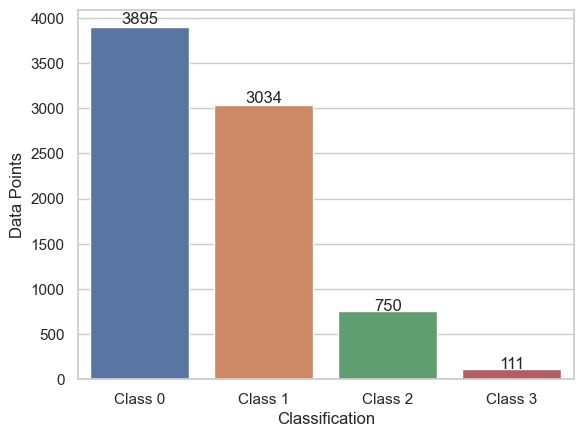

In [103]:
total_data_metrics = sns.barplot(data=total_class_records, x = "Class", y = "Data Points")
total_data_metrics.set(xlabel='Classification', ylabel='Data Points')

        
show_values(total_data_metrics)